In [1]:
from keras import layers, models

Using TensorFlow backend.


In [2]:
class ANN(models.Model):
    def __init__(self, Nin , Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)
        super().__init__(x,y)
        self.compile(loss ='mse',optimizer='sgd')

In [3]:
from keras import datasets
from sklearn import preprocessing

In [4]:
(X_train , y_train) , (X_test ,y_test) = datasets.boston_housing.load_data()
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

57344/57026 [==============================] - 0s 7us/step


In [5]:
from skeras import plot_loss

In [6]:
import matplotlib.pyplot as plt

In [7]:
Nin =13
Nh = 5
Nout =1
model = ANN(Nin, Nh , Nout)
history = model.fit(X_train ,y_train ,epochs = 100, 
                   batch_size =100 ,validation_split=0.2 ,verbose =2)

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 3s - loss: 562.4421 - val_loss: 528.2963
Epoch 2/100
 - 0s - loss: 352.0744 - val_loss: 119.0625
Epoch 3/100
 - 0s - loss: 115.7065 - val_loss: 100.3348
Epoch 4/100
 - 0s - loss: 80.1197 - val_loss: 75.9387
Epoch 5/100
 - 0s - loss: 65.8550 - val_loss: 109.7838
Epoch 6/100
 - 0s - loss: 62.1186 - val_loss: 61.8643
Epoch 7/100
 - 0s - loss: 49.9151 - val_loss: 57.4886
Epoch 8/100
 - 0s - loss: 46.5787 - val_loss: 49.4439
Epoch 9/100
 - 0s - loss: 47.8503 - val_loss: 95.2650
Epoch 10/100
 - 0s - loss: 48.0018 - val_loss: 44.7178
Epoch 11/100
 - 0s - loss: 51.5317 - val_loss: 43.9653
Epoch 12/100
 - 0s - loss: 40.4862 - val_loss: 42.7198
Epoch 13/100
 - 0s - loss: 37.1856 - val_loss: 43.9126
Epoch 14/100
 - 0s - loss: 43.1767 - val_loss: 43.4631
Epoch 15/100
 - 0s - loss: 48.6177 - val_loss: 36.0165
Epoch 16/100
 - 0s - loss: 44.2389 - val_loss: 36.3721
Epoch 17/100
 - 0s - loss: 39.4736 - val_loss: 34.1962
Epoch 18/100
 - 0s - l

In [8]:
performance_test = model.evaluate(X_test,y_test,batch_size =100)
print('test loss -> {:.2f}'.format(performance_test))

102/102 [==============================] - 0s 39us/step
test loss -> 21.14


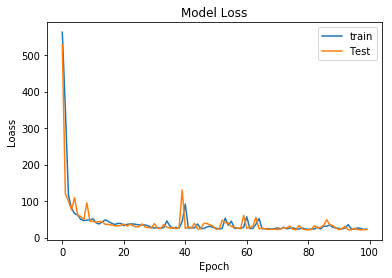

In [10]:
plot_loss(history)
plt.show()